In [62]:
import folium

m = folium.Map(location=[40, -95], zoom_start=4)

m

In [63]:
import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Unemployment Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)

m

In [64]:
# libraries
from mpl_toolkits.basemap import Basemap

import numpy as np
import matplotlib.pyplot as plt

# Set the plot size for this notebook:
plt.rcParams["figure.figsize"]=15,12

# A basic map
m=Basemap(llcrnrlon=-100, llcrnrlat=20, urcrnrlon=30, urcrnrlat=70, projection='merc')
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="white");

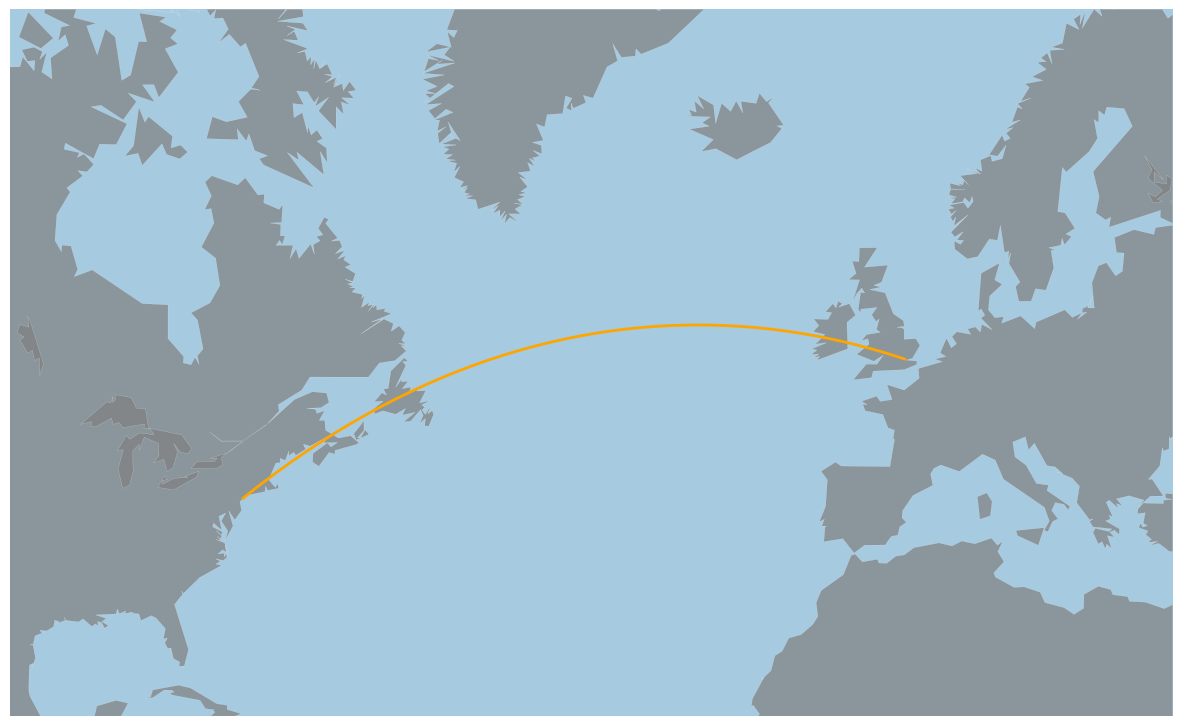

In [65]:
# Background map
m=Basemap(llcrnrlon=-100, llcrnrlat=20, urcrnrlon=30, urcrnrlat=70, projection='merc')
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="white")

# Add a connection between new york and London
startlat = 40.78; startlon = -73.98
arrlat = 51.53; arrlon = 0.08
m.drawgreatcircle(startlon, startlat, arrlon, arrlat, linewidth=2, color='orange');

In [66]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# lon_0, lat_0 are the center point of the projection.
# resolution = 'l' means use low resolution coastlines.
m = Basemap(projection='ortho',lon_0=-105,lat_0=40,resolution='l')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
m.drawmapboundary(fill_color='aqua')
plt.title("Full Disk Orthographic Projection")
plt.show()

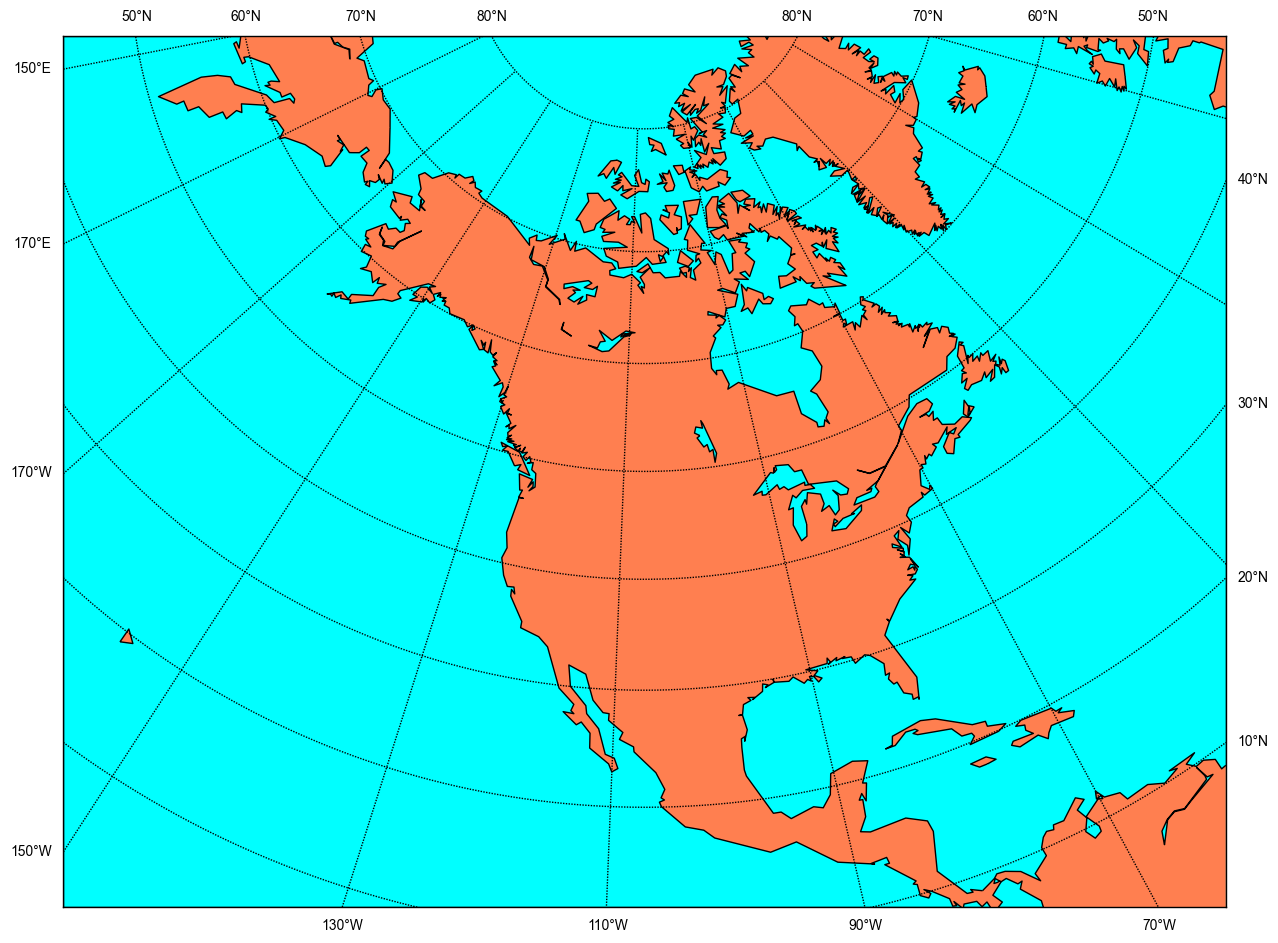

In [67]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# setup Lambert Conformal basemap.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
# draw coastlines.
m.drawcoastlines()
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
# label parallels on right and top
# meridians on bottom and left
parallels = np.arange(0.,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])
plt.show()

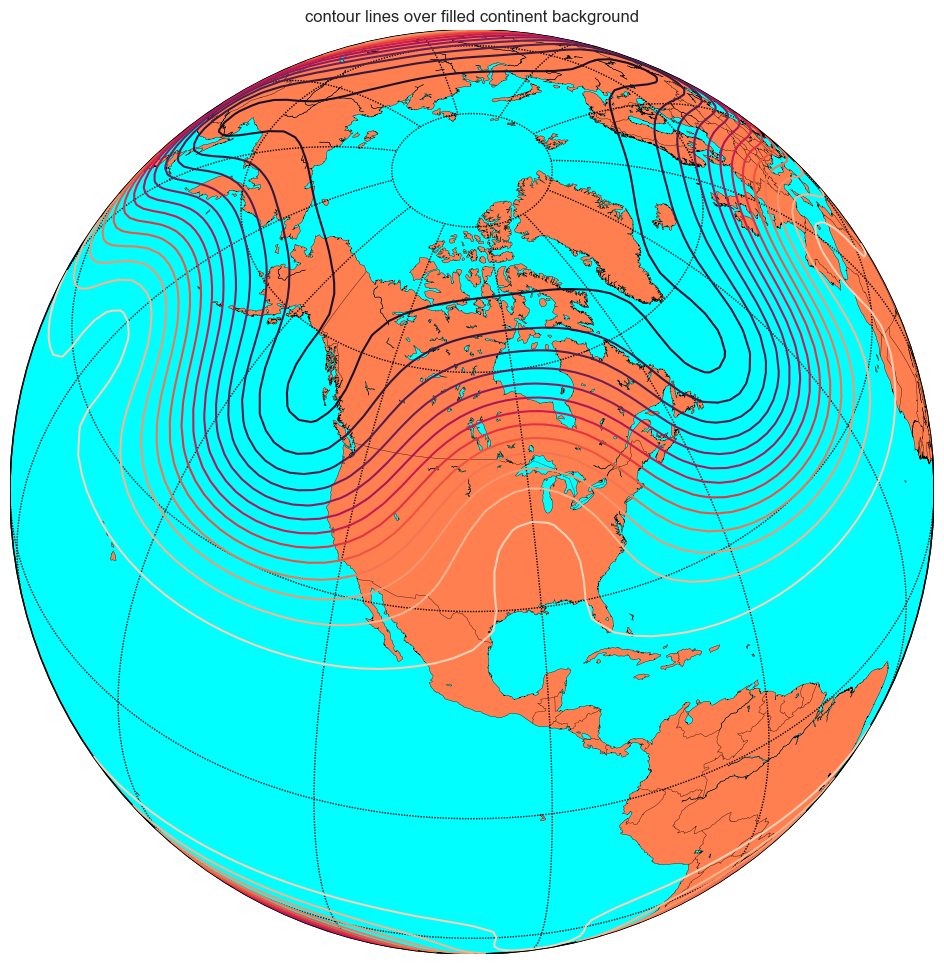

In [68]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# make up some data on a regular lat/lon grid.
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
# compute native map projection coordinates of lat/lon grid.
x, y = map(lons*180./np.pi, lats*180./np.pi)
# contour data over the map.
cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
plt.title('contour lines over filled continent background')
plt.show()

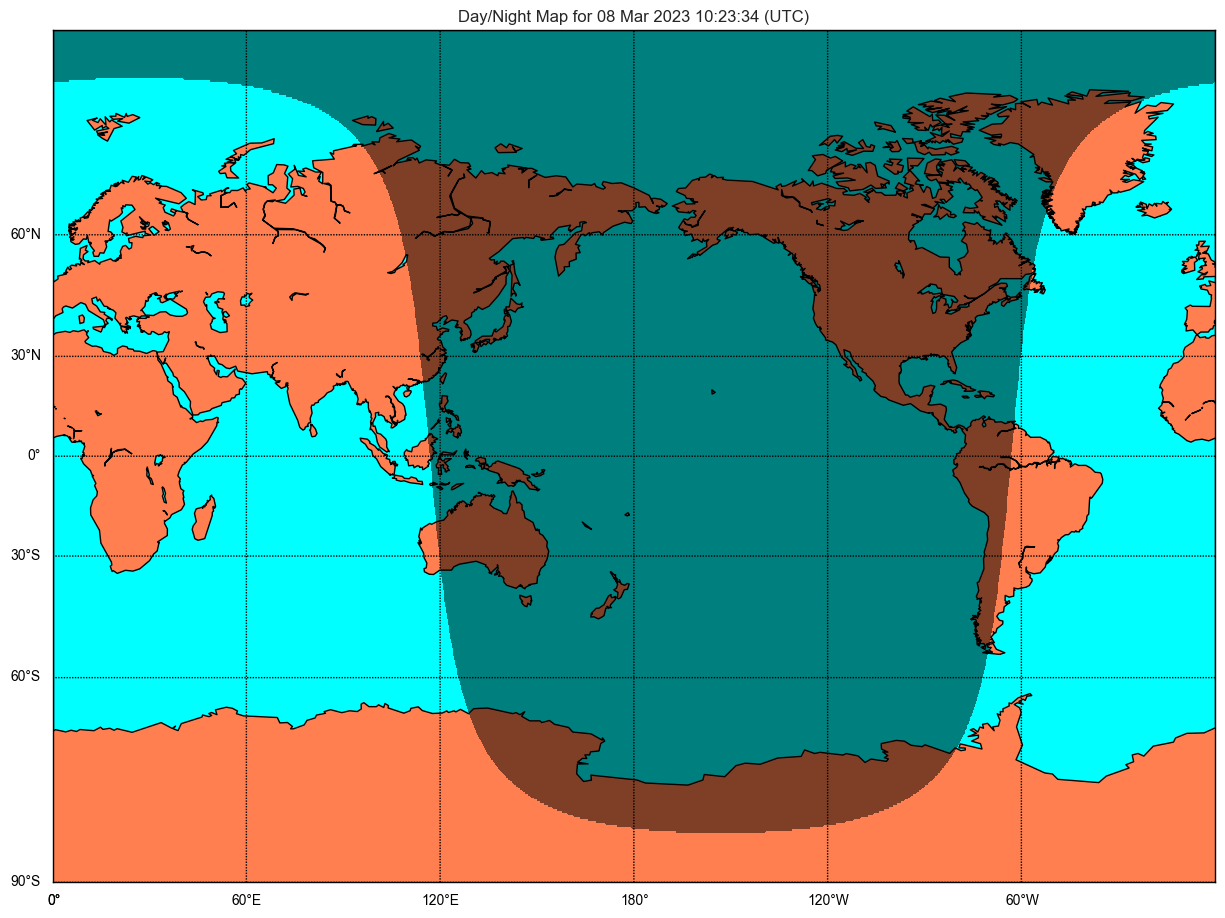

In [69]:
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from datetime import datetime
# miller projection
map = Basemap(projection='mill',lon_0=180)
# plot coastlines, draw label meridians and parallels.
map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])
# fill continents 'coral' (with zorder=0), color wet areas 'aqua'
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
# shade the night areas, with alpha transparency so the
# map shows through. Use current time in UTC.
date = datetime.utcnow()
CS=map.nightshade(date)
plt.title('Day/Night Map for %s (UTC)' % date.strftime("%d %b %Y %H:%M:%S"))
plt.show()

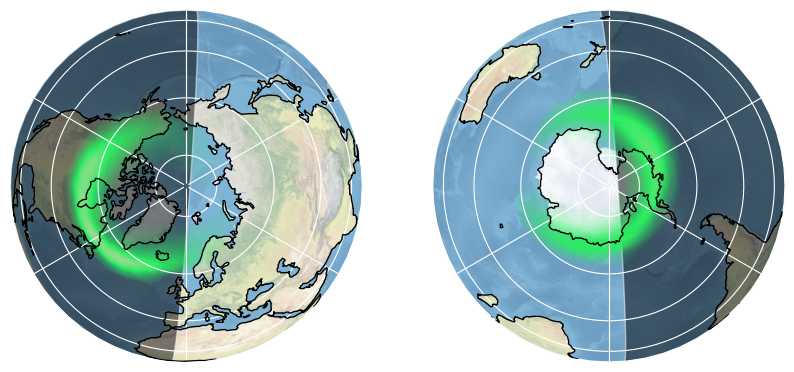

In [70]:
from datetime import datetime
from io import StringIO
from urllib.request import urlopen

import numpy as np
import cartopy.crs as ccrs
from cartopy.feature.nightshade import Nightshade
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


def aurora_forecast():
    """
    Get the latest Aurora Forecast from https://www.swpc.noaa.gov.

    Returns
    -------
    img : numpy array
        The pixels of the image in a numpy array.
    img_proj : cartopy CRS
        The rectangular coordinate system of the image.
    img_extent : tuple of floats
        The extent of the image ``(x0, y0, x1, y1)`` referenced in
        the ``img_proj`` coordinate system.
    origin : str
        The origin of the image to be passed through to matplotlib's imshow.
    dt : datetime
        Time of forecast validity.

    """

    # GitHub gist to download the example data from
    url = ('https://gist.githubusercontent.com/belteshassar/'
           'c7ea9e02a3e3934a9ddc/raw/aurora-nowcast-map.txt')
    # To plot the current forecast instead, uncomment the following line
    # url = 'https://services.swpc.noaa.gov/text/aurora-nowcast-map.txt'

    response_text = StringIO(urlopen(url).read().decode('utf-8'))
    img = np.loadtxt(response_text)
    # Read forecast date and time
    response_text.seek(0)
    for line in response_text:
        if line.startswith('Product Valid At:', 2):
            dt = datetime.strptime(line[-17:-1], '%Y-%m-%d %H:%M')

    img_proj = ccrs.PlateCarree()
    img_extent = (-180, 180, -90, 90)
    return img, img_proj, img_extent, 'lower', dt


def aurora_cmap():
    """Return a colormap with aurora like colors"""
    stops = {'red': [(0.00, 0.1725, 0.1725),
                     (0.50, 0.1725, 0.1725),
                     (1.00, 0.8353, 0.8353)],

             'green': [(0.00, 0.9294, 0.9294),
                       (0.50, 0.9294, 0.9294),
                       (1.00, 0.8235, 0.8235)],

             'blue': [(0.00, 0.3843, 0.3843),
                      (0.50, 0.3843, 0.3843),
                      (1.00, 0.6549, 0.6549)],

             'alpha': [(0.00, 0.0, 0.0),
                       (0.50, 1.0, 1.0),
                       (1.00, 1.0, 1.0)]}

    return LinearSegmentedColormap('aurora', stops)


def main():
    fig = plt.figure(figsize=[10, 5])

    # We choose to plot in an Orthographic projection as it looks natural
    # and the distortion is relatively small around the poles where
    # the aurora is most likely.

    # ax1 for Northern Hemisphere
    ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.Orthographic(0, 90))

    # ax2 for Southern Hemisphere
    ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.Orthographic(180, -90))

    img, crs, extent, origin, dt = aurora_forecast()

    for ax in [ax1, ax2]:
        ax.coastlines(zorder=3)
        ax.stock_img()
        ax.gridlines()
        ax.add_feature(Nightshade(dt))
        ax.imshow(img, vmin=0, vmax=100, transform=crs,
                  extent=extent, origin=origin, zorder=2,
                  cmap=aurora_cmap())

    plt.show()


if __name__ == '__main__':
    main()

Text(80.23, 16.61, 'Delhi')

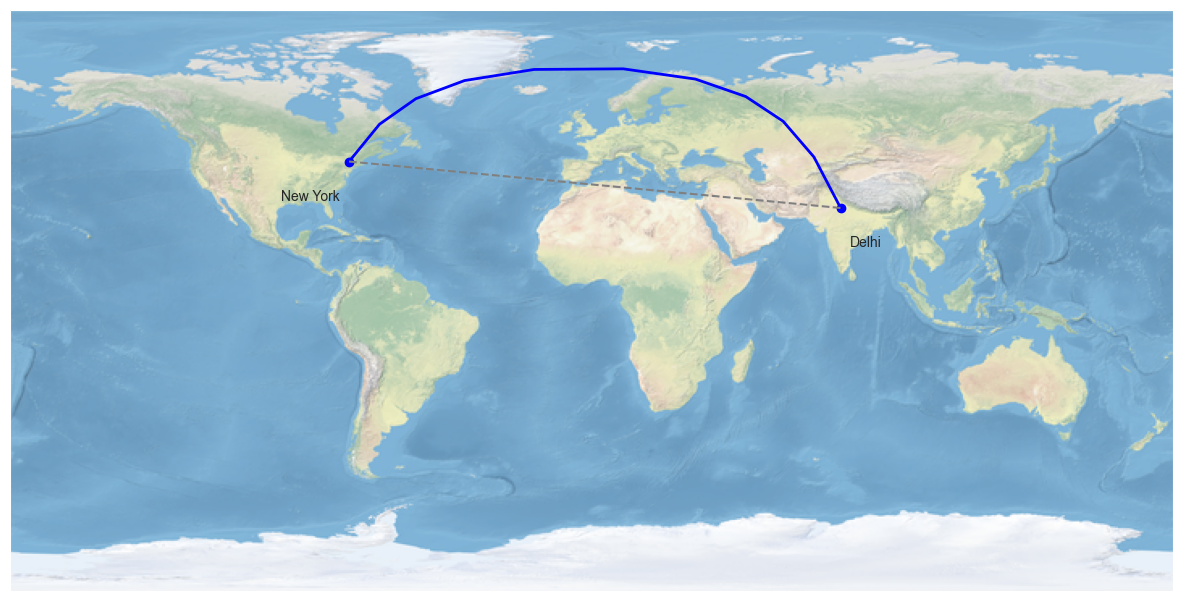

In [71]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree(),
         )

plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())


/opt/homebrew/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


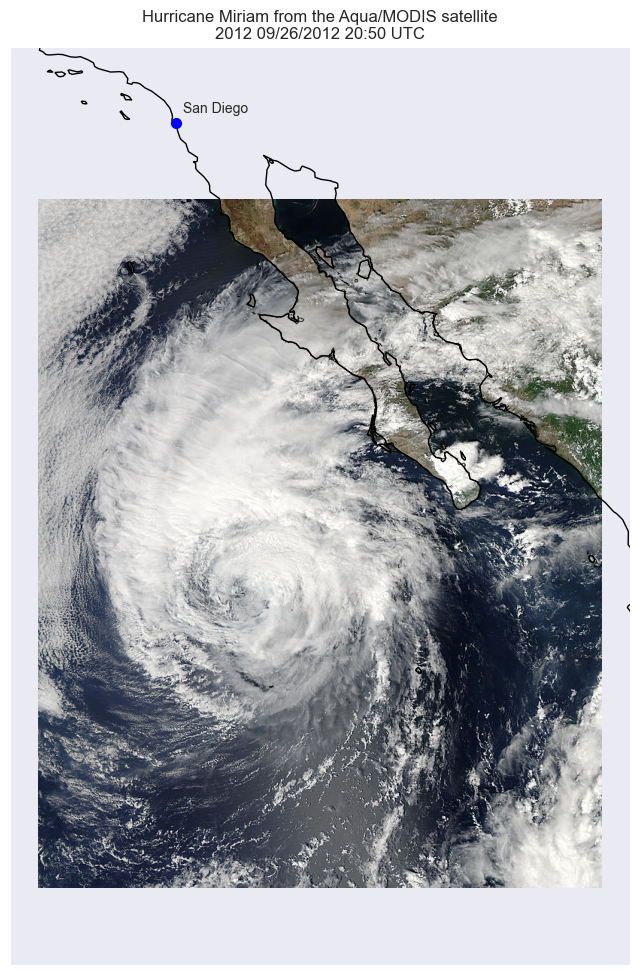

In [72]:
import os
import matplotlib.pyplot as plt

from cartopy import config
import cartopy.crs as ccrs


fig = plt.figure(figsize=(8, 12))

# get the path of the file. It can be found in the repo data directory.
fname = os.path.join(config["repo_data_dir"],
                     'raster', 'sample', 'Miriam.A2012270.2050.2km.jpg'
                     )
img_extent = (-120.67660000000001, -106.32104523100001, 13.2301484511245, 30.766899999999502)
img = plt.imread(fname)

ax = plt.axes(projection=ccrs.PlateCarree())
plt.title('Hurricane Miriam from the Aqua/MODIS satellite\n'
          '2012 09/26/2012 20:50 UTC')

ax.use_sticky_edges = False
# set a margin around the data
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)

# add the image. Because this image was a tif, the "origin" of the image is in the
# upper left corner
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='black', linewidth=1)

# mark a known place to help us geo-locate ourselves
ax.plot(-117.1625, 32.715, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-117, 33, 'San Diego', transform=ccrs.Geodetic())

plt.show()

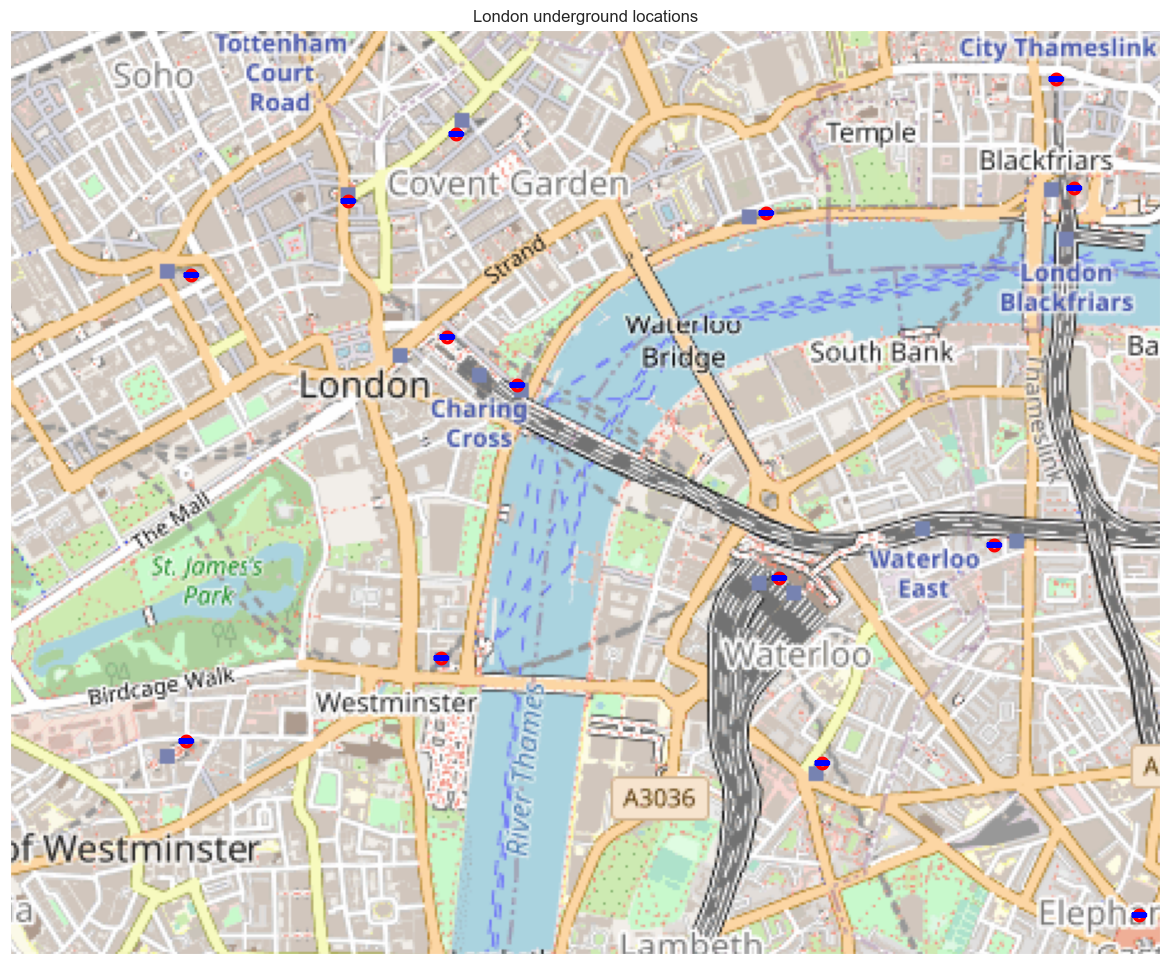

In [74]:
from matplotlib.path import Path
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM


def tube_locations():
    """
    Return an (n, 2) array of selected London Tube locations in Ordnance
    Survey GB coordinates.

    Source: https://www.doogal.co.uk/london_stations.php

    """
    return np.array([[531738., 180890.], [532379., 179734.],
                     [531096., 181642.], [530234., 180492.],
                     [531688., 181150.], [530242., 180982.],
                     [531940., 179144.], [530406., 180380.],
                     [529012., 180283.], [530553., 181488.],
                     [531165., 179489.], [529987., 180812.],
                     [532347., 180962.], [529102., 181227.],
                     [529612., 180625.], [531566., 180025.],
                     [529629., 179503.], [532105., 181261.],
                     [530995., 180810.], [529774., 181354.],
                     [528941., 179131.], [531050., 179933.],
                     [530240., 179718.]])


def main():
    imagery = OSM()

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=imagery.crs)
    ax.set_extent([-0.14, -0.1, 51.495, 51.515], ccrs.PlateCarree())

    # Construct concentric circles and a rectangle,
    # suitable for a London Underground logo.
    theta = np.linspace(0, 2 * np.pi, 100)
    circle_verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    concentric_circle = Path.make_compound_path(Path(circle_verts[::-1]),
                                                Path(circle_verts * 0.6))

    rectangle = Path([[-1.1, -0.2], [1, -0.2], [1, 0.3], [-1.1, 0.3]])

    # Add the imagery to the map.
    ax.add_image(imagery, 14)

    # Plot the locations twice, first with the red concentric circles,
    # then with the blue rectangle.
    xs, ys = tube_locations().T
    ax.plot(xs, ys, transform=ccrs.OSGB(approx=False),
            marker=concentric_circle, color='red', markersize=9, linestyle='')
    ax.plot(xs, ys, transform=ccrs.OSGB(approx=False),
            marker=rectangle, color='blue', markersize=11, linestyle='')

    ax.set_title('London underground locations')
    plt.show()


if __name__ == '__main__':
    main()
